In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [2]:
data = pd.read_csv(r"D:\New folder (2)\archive (3)\travel insurance.csv")

In [3]:
data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
data.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


## Univariate Analysis

<Axes: xlabel='Claim', ylabel='count'>

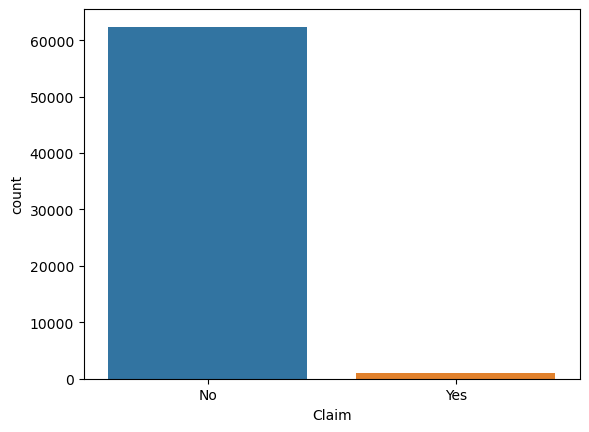

In [6]:
sns.countplot(x = 'Claim', data = data)

<Axes: xlabel='Agency Type', ylabel='count'>

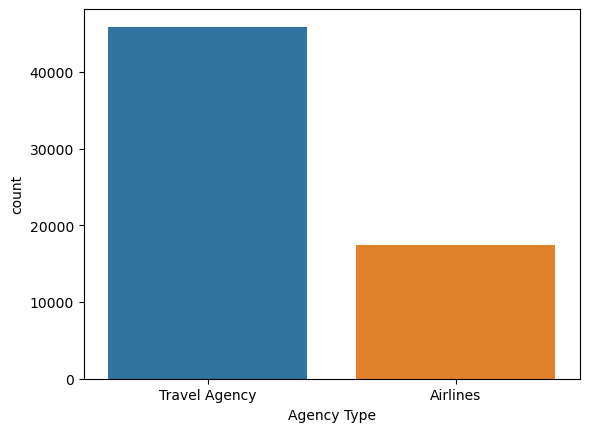

In [7]:
sns.countplot(x = 'Agency Type', data = data)

<Axes: xlabel='Agency', ylabel='count'>

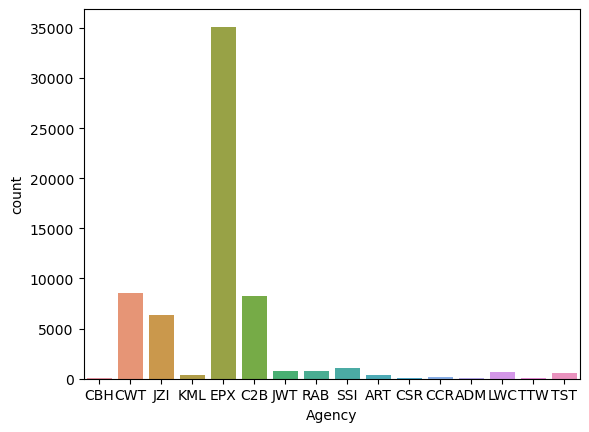

In [8]:
sns.countplot(x = 'Agency', data = data)

<Axes: xlabel='Distribution Channel', ylabel='count'>

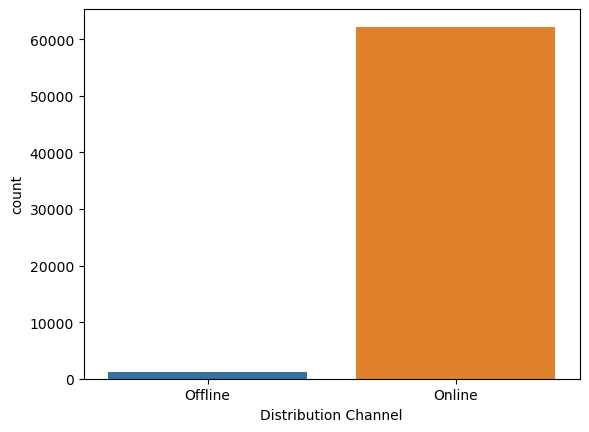

In [9]:
sns.countplot(x = 'Distribution Channel', data = data)

[Text(0, 0, 'Comprehensive Plan'), Text(1, 0, 'Rental Vehicle Excess Insurance'), Text(2, 0, 'Value Plan'), Text(3, 0, 'Basic Plan'), Text(4, 0, 'Premier Plan'), Text(5, 0, '2 way Comprehensive Plan'), Text(6, 0, 'Bronze Plan'), Text(7, 0, 'Silver Plan'), Text(8, 0, 'Annual Silver Plan'), Text(9, 0, 'Cancellation Plan'), Text(10, 0, '1 way Comprehensive Plan'), Text(11, 0, 'Ticket Protector'), Text(12, 0, '24 Protect'), Text(13, 0, 'Gold Plan'), Text(14, 0, 'Annual Gold Plan'), Text(15, 0, 'Single Trip Travel Protect Silver'), Text(16, 0, 'Individual Comprehensive Plan'), Text(17, 0, 'Spouse or Parents Comprehensive Plan'), Text(18, 0, 'Annual Travel Protect Silver'), Text(19, 0, 'Single Trip Travel Protect Platinum'), Text(20, 0, 'Annual Travel Protect Gold'), Text(21, 0, 'Single Trip Travel Protect Gold'), Text(22, 0, 'Annual Travel Protect Platinum'), Text(23, 0, 'Child Comprehensive Plan'), Text(24, 0, 'Travel Cruise Protect'), Text(25, 0, 'Travel Cruise Protect Family')]


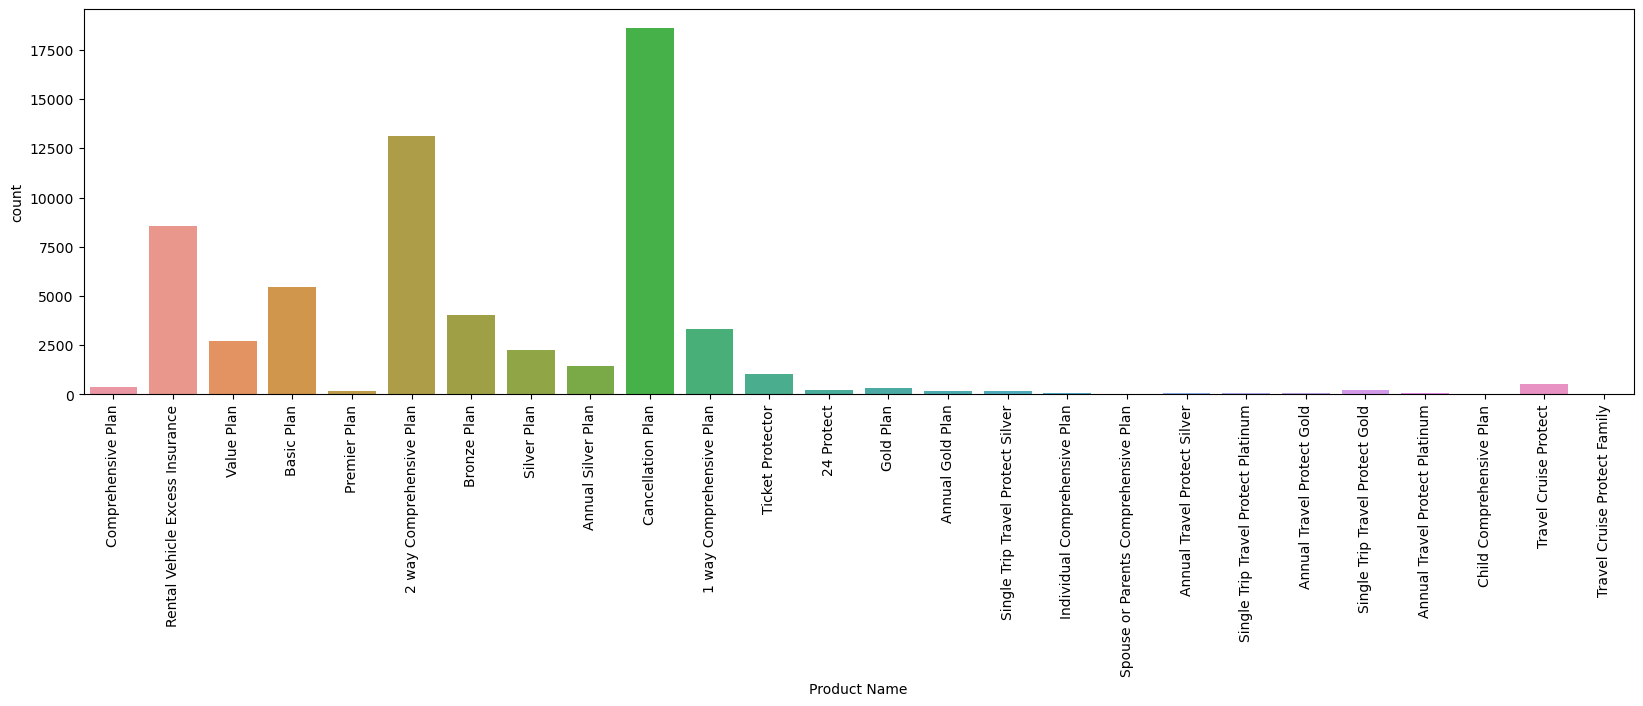

In [10]:
fig, ax = plt.subplots(figsize = (20, 5))

plot = sns.countplot(x = 'Product Name', data = data, ax = ax)
loc, labels = plt.xticks()
print(plot.set_xticklabels(labels, rotation=90))


<Axes: xlabel='Duration', ylabel='Count'>

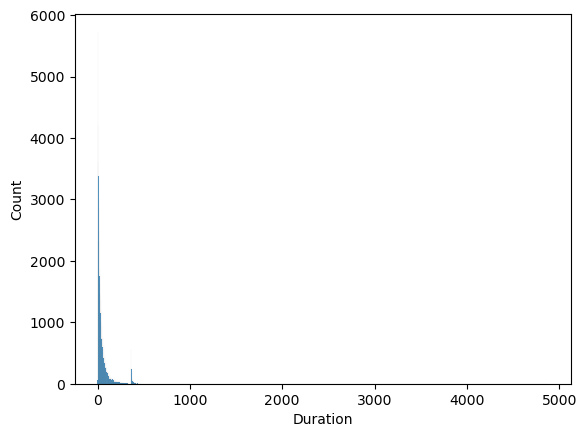

In [11]:
sns.histplot(data['Duration'])

In [12]:
data.Duration.unique()

array([ 186,   65,   60,   79,   66,   47,   63,   57,   33,    1,   53,
          5,   39,    6,   48,   11,    3,   14,  136,   12,    7,  190,
        364,   29,   28,  153,    4,   54,   24,    9,   45,   35,    8,
        183,   36,   38,   13,   27,   16,   19,   18,  189,  105,   23,
         15,  180,   90,   91,    2,   17,   10,  279,   92,   22,   64,
         37,   31,   41,  126,   50,   55,  181,   76,   43,   56,   20,
        164,   26,  152,   30,   32,  111,   34,  201,   62,   81,   42,
         49,  124,  118,   52,   59,   73,   21,   25,   94,   46,   82,
         40,  130,  388,  369,  368,  114,   85,  133,  103,  110,  147,
        306,   75,   83,   70,  104,  131,  202,  179,   61,  365,  374,
        386,   86,  100,  244,   99,  108,  277,  107,   87,  276,  123,
        122,  148,  278,  204,  112,   78,   97,  142,  351,   68,  163,
        197,   95,  125,   51,   69,   44,   71,   72,  178,   80,  150,
         74,  171,  127,  160,  168,  158,  325,  1

In [13]:
data.Destination.unique()

array(['MALAYSIA', 'AUSTRALIA', 'ITALY', 'UNITED STATES', 'THAILAND',
       "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", 'NORWAY', 'VIET NAM',
       'DENMARK', 'SINGAPORE', 'JAPAN', 'UNITED KINGDOM', 'INDONESIA',
       'INDIA', 'CHINA', 'FRANCE', 'TAIWAN, PROVINCE OF CHINA',
       'PHILIPPINES', 'MYANMAR', 'HONG KONG', 'KOREA, REPUBLIC OF',
       'UNITED ARAB EMIRATES', 'NAMIBIA', 'NEW ZEALAND', 'COSTA RICA',
       'BRUNEI DARUSSALAM', 'POLAND', 'SPAIN', 'CZECH REPUBLIC',
       'GERMANY', 'SRI LANKA', 'CAMBODIA', 'AUSTRIA', 'SOUTH AFRICA',
       'TANZANIA, UNITED REPUBLIC OF', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'NEPAL', 'NETHERLANDS', 'MACAO', 'CROATIA', 'FINLAND', 'CANADA',
       'TUNISIA', 'RUSSIAN FEDERATION', 'GREECE', 'BELGIUM', 'IRELAND',
       'SWITZERLAND', 'CHILE', 'ISRAEL', 'BANGLADESH', 'ICELAND',
       'PORTUGAL', 'ROMANIA', 'KENYA', 'GEORGIA', 'TURKEY', 'SWEDEN',
       'MALDIVES', 'ESTONIA', 'SAUDI ARABIA', 'PAKISTAN', 'QATAR', 'PERU',
       'LUXEMBOURG',

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), Text(6, 0, '7'), Text(7, 0, '8'), Text(8, 0, '9'), Text(9, 0, '10'), Text(10, 0, '11'), Text(11, 0, '12'), Text(12, 0, '13'), Text(13, 0, '14'), Text(14, 0, '15'), Text(15, 0, '16'), Text(16, 0, '17'), Text(17, 0, '18'), Text(18, 0, '19'), Text(19, 0, '20'), Text(20, 0, '21'), Text(21, 0, '22'), Text(22, 0, '23'), Text(23, 0, '24'), Text(24, 0, '25'), Text(25, 0, '26'), Text(26, 0, '27'), Text(27, 0, '28'), Text(28, 0, '29'), Text(29, 0, '30'), Text(30, 0, '31'), Text(31, 0, '32'), Text(32, 0, '33'), Text(33, 0, '34'), Text(34, 0, '35'), Text(35, 0, '36'), Text(36, 0, '37'), Text(37, 0, '38'), Text(38, 0, '39'), Text(39, 0, '40'), Text(40, 0, '41'), Text(41, 0, '42'), Text(42, 0, '43'), Text(43, 0, '44'), Text(44, 0, '45'), Text(45, 0, '46'), Text(46, 0, '47'), Text(47, 0, '48'), Text(48, 0, '49'), Text(49, 0, '50'), Text(50, 0, '51'), Text(51, 0, '52'), Text(52, 0, '53'), Text(53, 0,

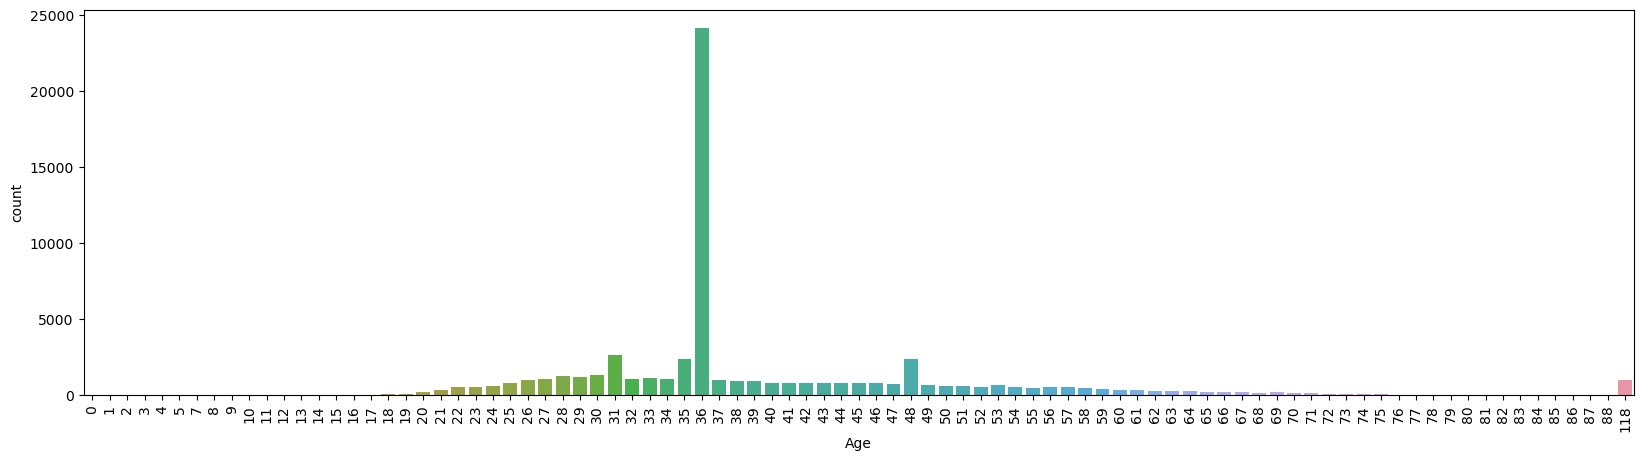

In [14]:
fig, ax = plt.subplots(figsize = (20, 5))

plot = sns.countplot(x = 'Age', data = data, ax = ax)
loc, labels = plt.xticks()
print(plot.set_xticklabels(labels, rotation=90))


In [15]:
data.drop('Gender', axis = 1, inplace = True)

C:\Temp\ipykernel_28928\1679999493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

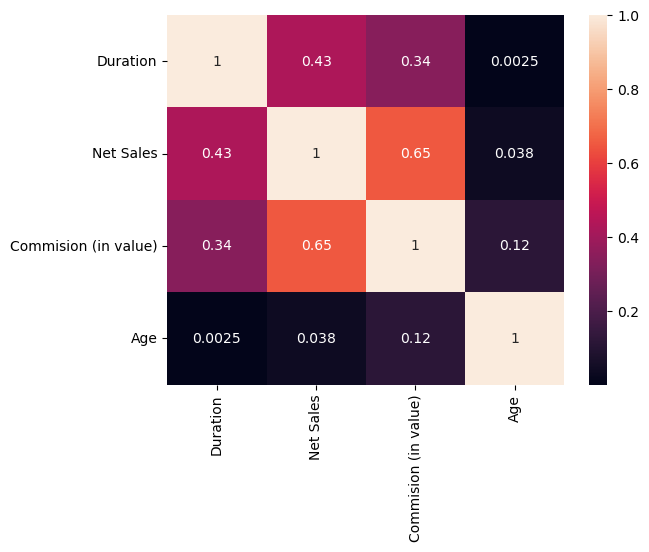

In [16]:
sns.heatmap(data.corr(), annot = True)

In [17]:
data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

In [3]:
data['Agency Type'] = data['Agency Type'].replace({'Travel Agency': 1, 'Airlines': 0})
Agency = pd.get_dummies(data['Agency'], drop_first = True)
Product = pd.get_dummies(data['Product Name'], drop_first = True)
data["Distribution Channel"] = data['Distribution Channel'].replace({'Online': 1, 'Offline': 0})
Destination = pd.get_dummies(data['Destination'], drop_first = True)

In [4]:
data =pd.concat([data, Agency, Product, Destination], axis = 1)

In [5]:
data.drop(['Agency', 'Product Name', 'Destination'], axis = 1, inplace = True)

In [ ]:
sns.heatmap(data.corr(), annot = True)

C:\Temp\ipykernel_28928\1679999493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

In [26]:
x.drop('Gender', axis = 1, inplace = True)

In [30]:
x = data.drop('Claim', axis = 1)
y = data['Claim']

In [31]:
y = y.replace({'Yes': 1, 'No': 0})

In [35]:
ss = StandardScaler()
X = ss.fit_transform(X)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
SVC = SVC()
SVC.fit(X_train, y_train)
score = SVC.score(X_test, y_test)

In [33]:
x.drop('Gender', axis = 1, inplace = True)

In [ ]:
score

In [103]:
print(classification_report(y_test, SVC.predict(X_test)))

              precision    recall  f1-score   support

          No       0.99      1.00      0.99     12497
         Yes       0.00      0.00      0.00       169

    accuracy                           0.99     12666
   macro avg       0.49      0.50      0.50     12666
weighted avg       0.97      0.99      0.98     12666



C:\Users\Kishore kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kishore kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kishore kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
sm = SMOTE()
X, y = sm.fit_resample(x, y)

In [15]:
y.value_counts()

0    62399
1    62399
Name: Claim, dtype: int64

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [39]:
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.9796474358974359

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12519
           1       0.97      0.99      0.98     12441

    accuracy                           0.98     24960
   macro avg       0.98      0.98      0.98     24960
weighted avg       0.98      0.98      0.98     24960



In [42]:
import pickle
with open ('Claim.pkl', 'wb') as f:
    pickle.dump(rfc, f)